# Project 3 - HR Machine Learning 

In [1]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv files into a pandas DataFrame

train_balanced = pd.read_csv('Kaggle Data/train_balanced.csv')
# train_balanced = train_balanced.set_index('enrollee_id')
train_balanced


,gender,relevant_experience,education_level,major_discipline,company_size,company_type,target
0,Male,Has relevant experience,Graduate,STEM,100-499,Pvt Ltd,0
1,Male,Has relevant experience,Masters,STEM,0-49,Early Stage Startup,0
2,Male,Has relevant experience,Graduate,STEM,1000-4999,Pvt Ltd,0
3,Male,Has relevant experience,Graduate,STEM,500-999,Pvt Ltd,1
4,Male,Has relevant experience,Graduate,STEM,50-99,Pvt Ltd,0
...,...,...,...,...,...,...,...
1606,Female,No relevant experience,Graduate,Other,0-49,Funded Startup,0
1607,Female,Has relevant experience,Graduate,STEM,100-499,Pvt Ltd,0
1608,Female,Has relevant experience,Masters,STEM,0-49,Early Stage Startup,0
1609,Female,Has relevant experience,Graduate,STEM,100-499,Public Sector,0


Cleaning and Preprocessing Data for Machine Learning

In [3]:
# train_balanced["company_size"].value_counts()

In [4]:
UCSD_survey_data = pd.read_csv('Kaggle Data/class_survey.csv')
UCSD_survey_data

,gender,relevant_experience,education_level,major_discipline,company_size,company_type
0,Male,Has relevant experience,Graduate,STEM,0-49,Other
1,Male,Has relevant experience,Graduate,STEM,100-499,Other
2,Female,No relevant experience,Graduate,Business Degree,0-49,Other
3,Female,Has relevant experience,Graduate,Business Degree,100-499,Funded Startup
4,Male,Has relevant experience,Graduate,Business Degree,0-49,Other
5,Female,No relevant experience,Graduate,Business Degree,0-49,Other
6,Female,Has relevant experience,Phd,STEM,100-499,Other
7,Female,Has relevant experience,Masters,Humanities,50-99,Early Stage Startup
8,Female,No relevant experience,Graduate,STEM,100-499,Funded Startup
9,Male,Has relevant experience,Graduate,STEM,100-499,Other


# Job Switching
Job switch by HR Analysis

This database was created to predict a candidate's decision to switch jobs, based upon the HR metrics collected. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by , with.

Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

## The Dataset
The following HR properties of employees included within the CSV:

enrollee_id : Unique ID for candidate

city: City code

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

target: 0 – Not looking for job change, 1 – Looking for a job change

Notes:
The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision
Please refer to the following task for more details:
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015


# Preprocessing

In [5]:
# Assign X (data) and y (target)
X = train_balanced.drop(["target"], axis=1)
y = train_balanced["target"]


print(X.shape, y.shape)

(1611, 6) (1611,)


In [6]:
X

,gender,relevant_experience,education_level,major_discipline,company_size,company_type
0,Male,Has relevant experience,Graduate,STEM,100-499,Pvt Ltd
1,Male,Has relevant experience,Masters,STEM,0-49,Early Stage Startup
2,Male,Has relevant experience,Graduate,STEM,1000-4999,Pvt Ltd
3,Male,Has relevant experience,Graduate,STEM,500-999,Pvt Ltd
4,Male,Has relevant experience,Graduate,STEM,50-99,Pvt Ltd
...,...,...,...,...,...,...
1606,Female,No relevant experience,Graduate,Other,0-49,Funded Startup
1607,Female,Has relevant experience,Graduate,STEM,100-499,Pvt Ltd
1608,Female,Has relevant experience,Masters,STEM,0-49,Early Stage Startup
1609,Female,Has relevant experience,Graduate,STEM,100-499,Public Sector


In [7]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1606    0
1607    0
1608    0
1609    0
1610    0
Name: target, Length: 1611, dtype: int64

Encode data into binary for model

In [8]:
# Binary encoding string data with Pandas get_dummies
train_data = X.copy()

X_encoded = pd.get_dummies(train_data, columns=["gender", "relevant_experience", "education_level", "major_discipline", "company_size", "company_type"])

# pd.set_option('display.max_columns', None)
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   gender_Female                                1611 non-null   uint8
 1   gender_Male                                  1611 non-null   uint8
 2   relevant_experience_Has relevant experience  1611 non-null   uint8
 3   relevant_experience_No relevant experience   1611 non-null   uint8
 4   education_level_Graduate                     1611 non-null   uint8
 5   education_level_Masters                      1611 non-null   uint8
 6   education_level_Phd                          1611 non-null   uint8
 7   major_discipline_Arts                        1611 non-null   uint8
 8   major_discipline_Business Degree             1611 non-null   uint8
 9   major_discipline_Humanities                  1611 non-null   uint8
 10  major_discipline_No Majo

In [9]:
X_encoded

,gender_Female,gender_Male,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,education_level_Graduate,education_level_Masters,education_level_Phd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1607,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1608,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1609,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Split our data into training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=1)

# Logistic Regression Model

In [11]:
from sklearn.linear_model import LogisticRegression
import joblib

LogReg = LogisticRegression()
LogReg

LogisticRegression()

In [12]:
# Fit (train) or model using the training data
LogReg.fit(X_train, y_train)

LogisticRegression()

Validate the model using the test data

In [13]:
print(f"Training Data Score: {LogReg.score(X_train, y_train)}")
print(f"Testing Data Score: {LogReg.score(X_test, y_test)}")

Training Data Score: 0.8236754966887417
Testing Data Score: 0.8312655086848635


Make predictions

In [14]:
LogReg_predictions = LogReg.predict(X_test)
print(f"First 10 Predictions:   {LogReg_predictions[:2000]}")
print(f"First 10 Actual targets: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 10 Actual targets: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [15]:
LogReg_results = pd.DataFrame({"Prediction": LogReg_predictions, "Actual": y_test}).reset_index(drop=True)
LogReg_results

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
398,0,0
399,0,0
400,0,0
401,0,0


In [16]:
list(X_encoded.columns.values)

['gender_Female',
 'gender_Male',
 'relevant_experience_Has relevant experience',
 'relevant_experience_No relevant experience',
 'education_level_Graduate',
 'education_level_Masters',
 'education_level_Phd',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_0-49',
 'company_size_100-499',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_type_Early Stage Startup',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd']

In [17]:
# Binary encoding survey data with Pandas get_dummies
survey_data = UCSD_survey_data.copy()

survey_encoded = pd.get_dummies(survey_data, columns=["gender", "relevant_experience", "education_level", "major_discipline", "company_size", "company_type"])
survey_encoded[['major_discipline_Arts', 'major_discipline_No Major', 'company_size_500-999', 'company_size_1000-4999', 'company_size_5000-9999', 'company_size_10000+', 'company_type_NGO', 'company_type_Pvt Ltd', 'company_type_Public Sector']] = 0
# list(survey_encoded.columns.values)
survey_encoded = survey_encoded[['gender_Female',
 'gender_Male',
 'relevant_experience_Has relevant experience',
 'relevant_experience_No relevant experience',
 'education_level_Graduate',
 'education_level_Masters',
 'education_level_Phd',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'company_size_0-49',
 'company_size_100-499',
 'company_size_1000-4999',
 'company_size_10000+',
 'company_size_50-99',
 'company_size_500-999',
 'company_size_5000-9999',
 'company_type_Early Stage Startup',
 'company_type_Funded Startup',
 'company_type_NGO',
 'company_type_Other',
 'company_type_Public Sector',
 'company_type_Pvt Ltd']]
# pd.set_option('display.max_columns', None)
survey_encoded.head()

,gender_Female,gender_Male,relevant_experience_Has relevant experience,relevant_experience_No relevant experience,education_level_Graduate,education_level_Masters,education_level_Phd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,...,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
# Survey Predictions
LogReg_predictions = LogReg.predict(survey_encoded)
print(f"First 10 Predictions:   {LogReg_predictions[:50]}")


First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
# # Save the model to disk
# joblib.dump(LogReg, "HR_LRmodel_trained_V2.h5")

['HR_LRmodel_trained_V2.h5']

In [20]:
# # load model
# HR_LogReg_model = joblib.load("HR_LRmodel_trained_V2.h5")
# result_test = HR_LogReg_model.score(X_test, y_test)
# result_test

0.8312655086848635

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
# rf.score(X_test, y_test)

print(f"Training Data Score: {rf.score(X_train, y_train)}")
print(f"Testing Data Score: {rf.score(X_test, y_test)}")

Training Data Score: 0.8485099337748344
Testing Data Score: 0.8213399503722084


In [22]:
RF_predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {RF_predictions[:500]}")
print(f"First 10 Actual targets: {y_test[:50].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
First 10 Actual targets: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 

In [23]:
RF_results = pd.DataFrame({"Prediction": RF_predictions, "Actual": y_test}).reset_index(drop=True)
RF_results.tail(20)

,Prediction,Actual
383,0,1
384,0,0
385,0,0
386,0,1
387,0,0
388,0,0
389,0,1
390,0,0
391,0,0
392,1,0


In [24]:
feature_names = X_train.columns
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.06293078358939085, 'company_type_Pvt Ltd'),
 (0.05937411594794991, 'education_level_Masters'),
 (0.05873616942422247, 'education_level_Graduate'),
 (0.05600745121768798, 'company_size_50-99'),
 (0.0554662819675575, 'gender_Male'),
 (0.05143954457616853, 'gender_Female'),
 (0.0491201904782218, 'company_size_100-499'),
 (0.04888267878820013, 'company_size_0-49'),
 (0.04876930757865188, 'company_type_Public Sector'),
 (0.04283342301943147, 'relevant_experience_No relevant experience'),
 (0.041573945775860946, 'major_discipline_STEM'),
 (0.041103885676285035, 'company_size_1000-4999'),
 (0.041028689001525204, 'company_type_NGO'),
 (0.04089119662621005, 'relevant_experience_Has relevant experience'),
 (0.038711015007381916, 'company_type_Funded Startup'),
 (0.0365775594475424, 'company_size_10000+'),
 (0.03269505750079922, 'company_size_500-999'),
 (0.029700705768942508, 'company_size_5000-9999'),
 (0.02897829160592559, 'major_discipline_Humanities'),
 (0.025653185733430214, 'company_ty

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [26]:
# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [27]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[ 0.99834574, -0.99834574, -2.37431309, ..., -0.08164966,
        -0.28202003,  0.60157628],
       [-1.001657  ,  1.001657  ,  0.42117445, ..., -0.08164966,
        -0.28202003,  0.60157628],
       [ 0.99834574, -0.99834574,  0.42117445, ..., -0.08164966,
        -0.28202003,  0.60157628],
       ...,
       [ 0.99834574, -0.99834574,  0.42117445, ..., -0.08164966,
        -0.28202003,  0.60157628],
       [-1.001657  ,  1.001657  ,  0.42117445, ..., -0.08164966,
        -0.28202003,  0.60157628],
       [ 0.99834574, -0.99834574, -2.37431309, ..., -0.08164966,
         3.54584739, -1.66229957]])

Finding optimal K value

k: 1, Train/Test Score: 0.766/0.702
k: 3, Train/Test Score: 0.814/0.779
k: 5, Train/Test Score: 0.827/0.819
k: 7, Train/Test Score: 0.825/0.829
k: 9, Train/Test Score: 0.823/0.831
k: 11, Train/Test Score: 0.824/0.831
k: 13, Train/Test Score: 0.824/0.831
k: 15, Train/Test Score: 0.824/0.831
k: 17, Train/Test Score: 0.824/0.831
k: 19, Train/Test Score: 0.824/0.831


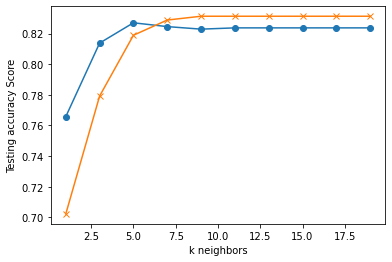

In [28]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")

plt.savefig('Visualizations/KNN_eval_2nd.png')
plt.show()

In [29]:
# Note that k: XXX seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=7 Test Acc: 0.777


In [30]:
print(f"Training Data Score: {knn.score(X_train, y_train)}")
print(f"Testing Data Score: {knn.score(X_test, y_test)}")

Training Data Score: 0.8236754966887417
Testing Data Score: 0.8312655086848635


In [31]:
KNN_predictions = knn.predict(X_test)
print(f"First 10 Predictions:   {KNN_predictions[:1000]}")
print(f"First 10 Actual targets: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
First 10 Actual targets: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]


In [32]:
KNN_results = pd.DataFrame({"Prediction": KNN_predictions, "Actual": y_test}).reset_index(drop=True)
KNN_results

,Prediction,Actual
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
398,0,0
399,0,0
400,0,0
401,0,0


In [33]:
from sklearn.model_selection import cross_val_score
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import SMOTE

def evaluate_model(model, X, y):
    
#     classifier = Pipeline([
#         ('passthrough', SMOTE()),
#         ('model', model)
#     ])
    
    model.fit(X, y)
    
    auc = cross_val_score(model, X, y, cv=None, scoring='roc_auc')
    print("AUC score of " + model.__class__.__name__ + " = " + str(auc.mean()))
    
    return model

In [34]:
classifier_LR = evaluate_model(LogisticRegression(), X_train, y_train)
classifier_RF = evaluate_model(RandomForestClassifier(), X_train, y_train)
classifier_KNN = evaluate_model(KNeighborsClassifier(), X_train, y_train)

AUC score of LogisticRegression = 0.4548370312247839
AUC score of RandomForestClassifier = 0.47526057752772727
AUC score of KNeighborsClassifier = 0.49795906442511556


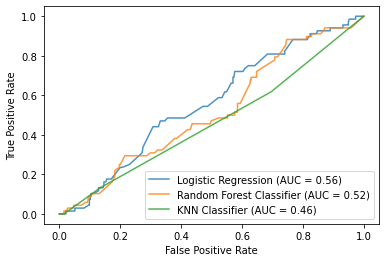

In [35]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
plot_roc_curve(classifier_LR, X_test, y_test, ax=ax, alpha=0.8, name="Logistic Regression")
plot_roc_curve(classifier_RF, X_test, y_test, ax=ax, alpha=0.8, name="Random Forest Classifier")
plot_roc_curve(classifier_KNN, X_test, y_test, ax=ax, alpha=0.8, name="KNN Classifier")

plt.savefig('Visualizations/AUC_comparison_2nd.png')
plt.show()

In [54]:
def Model_Prediction(model, X):
    
    # Survey Predictions
    prediction = model.predict(X)
    
    print(f"First 10 Predictions:   {prediction}")
    
    print("Model: " + model.__class__.__name__)
    
    return model

In [55]:
HR_LogReg_prediction = Model_Prediction(HR_LogReg_model, survey_encoded)

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model: LogisticRegression


In [56]:
HR_LogReg_prediction = Model_Prediction(HR_LogReg_model, survey_encoded[:5])

First 10 Predictions:   [0 0 0 0 0]
Model: LogisticRegression


In [57]:
HR_LogReg_prediction = Model_Prediction(HR_LogReg_model, X_test)

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Model: LogisticRegression
